In [2]:
FL_tagall = pd.read_pickle(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\疾病检出率预测\脂肪肝.pkl")

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymysql

In [79]:
conn=pymysql.connect(host='mysql-backup.shanzhen.me',
                     user='readonly_medicine_liuqq',
                     password="r3g1^QWgV8GeYJw4",
                     database='asgard_dataplatform',
                     port= 3001,
                     charset='utf8')

In [80]:
def get_SqlData(path):
    dict_ = pd.read_excel(path)
    id_list = dict_.loc[:,'TagID'].values.tolist()
    tag_df = pd.DataFrame(columns=['ORDER_CODE', 'TAG_ID'])
    for items in id_list:        
        id_str = "'"+ items + "'"
        tagsql = 'SELECT p1.ORDER_CODE ,p1.TAG_ID,p2.EXAM_DATE,p2.EXAMINEE_AGE,p2.EXAMINEE_GENDER,IF (p3.IS_ABNORMAL = TRUE, 1,0) AS "总胆固醇异常",IF (p4.IS_ABNORMAL = TRUE, 1,0) AS "甘油三酯异常",IF (p5.IS_ABNORMAL = TRUE, 1,0) AS "LDL异常",IF (p6.IS_ABNORMAL = TRUE, 1,0) AS "HDL异常" \
FROM (SELECT * FROM T66_APOLLO_ANALYSIS_TAG WHERE SOURCE_TYPE = 2 AND SZ_STATUS = 1 AND TAG_ID IN ('+id_str+'))p1 \
LEFT JOIN (SELECT * FROM t66_athena_basic_raw_person_info WHERE SZ_STATUS = 1)p2 ON p1.ORDER_CODE = p2.ORDER_CODE \
LEFT JOIN (SELECT * FROM t66_athena_basic_quantity_record WHERE SD_CODE = "S0000175N23" AND SZ_STATUS = 1)p3 ON p1.ORDER_CODE = p3.ORDER_CODE \
LEFT JOIN (SELECT * FROM t66_athena_basic_quantity_record WHERE SD_CODE = "S0000176N71" AND SZ_STATUS = 1)p4 ON p1.ORDER_CODE = p4.ORDER_CODE \
LEFT JOIN (SELECT * FROM t66_athena_basic_quantity_record WHERE SD_CODE = "S0000177N19" AND SZ_STATUS = 1)p5 ON p1.ORDER_CODE = p5.ORDER_CODE \
LEFT JOIN (SELECT * FROM t66_athena_basic_quantity_record WHERE SD_CODE = "S0000178N65" AND SZ_STATUS = 1 )p6 ON p1.ORDER_CODE = p6.ORDER_CODE'  
        tag = pd.read_sql(tagsql,con=conn)
        tag_df = pd.concat([tag_df,tag],axis = 0)
    return tag_df

FL_tag_df = get_SqlData(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\疾病检出率预测\TS_脂肪肝.xls")

DatabaseError: Execution failed on sql: SELECT p1.ORDER_CODE ,p1.TAG_ID,p2.EXAM_DATE,p2.EXAMINEE_AGE,p2.EXAMINEE_GENDER,IF (p3.IS_ABNORMAL = TRUE, 1,0) AS "总胆固醇异常",IF (p4.IS_ABNORMAL = TRUE, 1,0) AS "甘油三酯异常",IF (p5.IS_ABNORMAL = TRUE, 1,0) AS "LDL异常",IF (p6.IS_ABNORMAL = TRUE, 1,0) AS "HDL异常" FROM (SELECT * FROM T66_APOLLO_ANALYSIS_TAG WHERE SOURCE_TYPE = 2 AND SZ_STATUS = 1 AND TAG_ID IN ('OBDIM0002EX'))p1 LEFT JOIN (SELECT * FROM t66_athena_basic_raw_person_info WHERE SZ_STATUS = 1)p2 ON p1.ORDER_CODE = p2.ORDER_CODE LEFT JOIN (SELECT * FROM t66_athena_basic_quantity_record WHERE SD_CODE = "S0000175N23" AND SZ_STATUS = 1)p3 ON p1.ORDER_CODE = p3.ORDER_CODE LEFT JOIN (SELECT * FROM t66_athena_basic_quantity_record WHERE SD_CODE = "S0000176N71" AND SZ_STATUS = 1)p4 ON p1.ORDER_CODE = p4.ORDER_CODE LEFT JOIN (SELECT * FROM t66_athena_basic_quantity_record WHERE SD_CODE = "S0000177N19" AND SZ_STATUS = 1)p5 ON p1.ORDER_CODE = p5.ORDER_CODE LEFT JOIN (SELECT * FROM t66_athena_basic_quantity_record WHERE SD_CODE = "S0000178N65" AND SZ_STATUS = 1 )p6 ON p1.ORDER_CODE = p6.ORDER_CODE
(2013, 'Lost connection to MySQL server during query')
unable to rollback

In [81]:
FL_tag_df

NameError: name 'FL_tag_df' is not defined

In [3]:
FL_tagall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985353 entries, 0 to 2255
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ORDER_CODE       985353 non-null  object        
 1   TAG_ID           985353 non-null  object        
 2   EXAM_DATE        717988 non-null  datetime64[ns]
 3   EXAMINEE_GENDER  717988 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 37.6+ MB


In [4]:
FL_tagall1 = FL_tagall.copy()

In [6]:
FL_tagall1.dropna(subset = ["EXAM_DATE"],inplace = True)

In [7]:
FL_tagall1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717988 entries, 0 to 1807
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ORDER_CODE       717988 non-null  object        
 1   TAG_ID           717988 non-null  object        
 2   EXAM_DATE        717988 non-null  datetime64[ns]
 3   EXAMINEE_GENDER  717988 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 27.4+ MB


In [ ]:
FLdict = pd.read_excel(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\疾病检出率预测\TS_脂肪肝.xls")
dict_abbr = FLdict.set_index("TagID").to_dict()["abbr1"]
FL_tagall1.replace(dict_abbr,inplace=True)
tagall_abbr = FL_tagall1.drop_duplicates().set_index('EXAM_DATE',drop=True)

In [17]:
tagall_abbr = FL_tagall1.drop_duplicates().set_index('EXAM_DATE',drop=True).sort_values(by = 'EXAM_DATE' )

In [39]:
tagall_abbr["value"]=1

In [24]:
DateCount = tagall_abbr.groupby([tagall_abbr.index.year,tagall_abbr.index.month])['ORDER_CODE'].count()

In [30]:
DC = pd.DataFrame(DateCount)
DC

ORDER_CODE
EXAM_DATE EXAM_DATE            
2015      8                  89
          9                 144
          10                133
          11                500
          12                588
...                         ...
2020      5               18258
          6               19007
          7               20481
          8               19575
          9                2679

[61 rows x 1 columns]

In [52]:
DC.loc[tagall_abbr.index.year == 2017,:]

IndexError: Boolean index has wrong length: 537664 instead of 61

In [26]:
import matplotlib.pyplot as plt

C:\Users\13670\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\13670\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\13670\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\13670\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


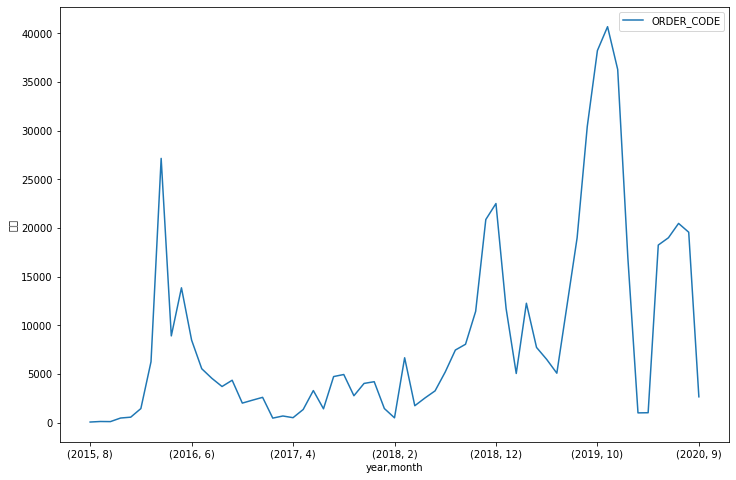

In [29]:
DC.plot(figsize=(12, 8))
plt.xlabel('year,month')
plt.ylabel('人数')
plt.show()

In [37]:
ReCount = tagall_abbr.groupby([tagall_abbr.index.year,tagall_abbr.index.month,tagall_abbr.TAG_ID])['ORDER_CODE'].count()

In [47]:
RC = pd.DataFrame(ReCount).unstack()
RC.columns = ['肝脏超声检查','脂肪肝']
RC["rate"] =(RC['脂肪肝'] / RC['肝脏超声检查']) *100

In [48]:
RC

肝脏超声检查   脂肪肝       rate
EXAM_DATE EXAM_DATE                         
2015      8              67    22  32.835821
          9             112    32  28.571429
          10            100    33  33.000000
          11            388   112  28.865979
          12            442   146  33.031674
...                     ...   ...        ...
2020      5           12998  5260  40.467764
          6           13528  5479  40.501183
          7           14737  5744  38.976725
          8           14167  5408  38.173219
          9            1930   749  38.808290

[61 rows x 3 columns]

In [58]:
index_ = RC[RC.rate == RC.rate.min()].index
index_

MultiIndex([(2017, 8)],
           names=['EXAM_DATE', 'EXAM_DATE'])

In [55]:
RC.rate.min()

21.943091514996155

In [72]:
tagall_abbr.index.month.tolist()

[8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10

In [75]:
tagdf1 = tagall_abbr.loc[(tagall_abbr.index.month == 8),:]
tagdf2 = tagdf1.loc[tagdf1.index.year == 2017,:]
order_list = tagdf2.ORDER_CODE
order_list.to_excel(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\疾病检出率预测\2017.8订单号.xlsx")

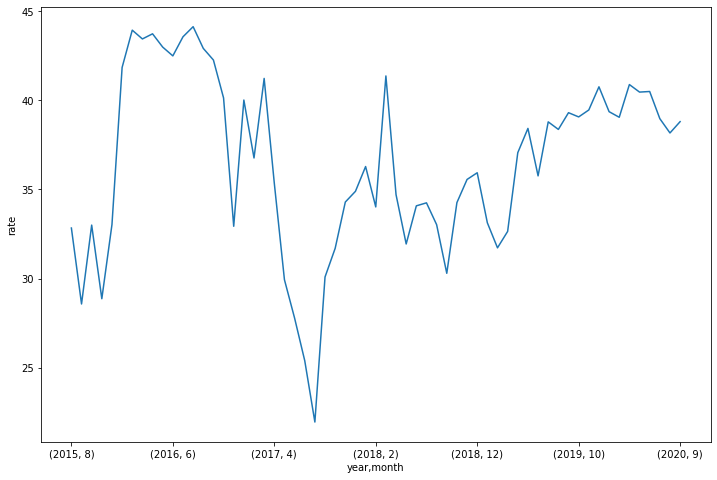

In [50]:
RC.rate.plot(figsize=(12, 8))
plt.xlabel('year,month')
plt.ylabel('rate')
plt.show()

In [45]:
RC.columns.values.tolist() 

[('ORDER_CODE', '肝脏超声检查'), ('ORDER_CODE', '脂肪肝')]

In [46]:
RC.columns = ['肝脏超声检查','脂肪肝']
RC

肝脏超声检查   脂肪肝
EXAM_DATE EXAM_DATE              
2015      8              67    22
          9             112    32
          10            100    33
          11            388   112
          12            442   146
...                     ...   ...
2020      5           12998  5260
          6           13528  5479
          7           14737  5744
          8           14167  5408
          9            1930   749

[61 rows x 2 columns]

In [1]:
# -*- coding: utf-8 -*-
# 用 ARIMA 进行时间序列预测
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import acf,pacf,plot_acf,plot_pacf
from statsmodels.graphics.api import qqplot

In [ ]:
# 1.创建数据
data = [5922, 5308, 5546, 5975, 2704, 1767, 4111, 5542, 4726, 5866, 6183, 3199, 1471, 1325, 6618, 6644, 5337, 7064, 2912, 1456, 4705, 4579, 4990, 4331, 4481, 1813, 1258, 4383, 5451, 5169, 5362, 6259, 3743, 2268, 5397, 5821, 6115, 6631, 6474, 4134, 2728, 5753, 7130, 7860, 6991, 7499, 5301, 2808, 6755, 6658, 7644, 6472, 8680, 6366, 5252, 8223, 8181, 10548, 11823, 14640, 9873, 6613, 14415, 13204, 14982, 9690, 10693, 8276, 4519, 7865, 8137, 10022, 7646, 8749, 5246, 4736, 9705, 7501, 9587, 10078, 9732, 6986, 4385, 8451, 9815, 10894, 10287, 9666, 6072, 5418]

data = pd.Series(data)
data.index = pd.Index(sm.tsa.datetools.dates_from_range('1901','1990'))
data.plot(figsize=(12,8))

#绘制时序的数据图
plt.show()

#2.下面我们先对非平稳时间序列进行时间序列的差分，找出适合的差分次数d的值：
#fig = plt.figure(figsize=(12, 8))
#ax1 = fig.add_subplot(111)
#diff1 = data.diff(1)
#diff1.plot(ax=ax1)
#这里是做了1阶差分，可以看出时间序列的均值和方差基本平稳，不过还是可以比较一下二阶差分的效果：

#这里进行二阶差分
#fig = plt.figure(figsize=(12, 8))
#ax2 = fig.add_subplot(111)
#diff2 = data.diff(2)
#diff2.plot(ax=ax2)
#由下图可以看出来一阶跟二阶的差分差别不是很大，所以可以把差分次数d设置为1，上面的一阶和二阶程序我们注释掉

#这里我们使用一阶差分的时间序列
#3.接下来我们要找到ARIMA模型中合适的p和q值：
data1 = data.diff(1)
data1.dropna(inplace=True)
#加上这一步，不然后面画出的acf和pacf图会是一条直线

#第一步：先检查平稳序列的自相关图和偏自相关图
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data1,lags=40,ax=ax1)
#lags 表示滞后的阶数
#第二步：下面分别得到acf 图和pacf 图
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data1, lags=40,ax=ax2)

#由上图可知，我们可以分别用ARMA(7,0)模型、ARMA(7,1)模型、ARMA(8,0)模型等来拟合找出最佳模型：
#第三步:找出最佳模型ARMA
arma_mod1 = sm.tsa.ARMA(data1,(7,0)).fit()
print(arma_mod1.aic, arma_mod1.bic, arma_mod1.hqic)
arma_mod2 = sm.tsa.ARMA(data1,(7,1)).fit()
print(arma_mod2.aic, arma_mod2.bic, arma_mod2.hqic)
arma_mod3 = sm.tsa.ARMA(data1,(8,0)).fit()
print(arma_mod3.aic, arma_mod3.bic, arma_mod3.hqic)

#由上面可以看出ARMA(7,0)模型最佳
#第四步：进行模型检验
#首先对ARMA(7,0)模型所产生的残差做自相关图
resid = arma_mod1.resid
#一定要加上这个变量赋值语句，不然会报错resid is not defined 
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40,ax=ax2)

#接着做德宾-沃森（D-W）检验
print(sm.stats.durbin_watson(arma_mod1.resid.values))
#得出来结果是不存在自相关性的

#再观察是否符合正态分布,这里用qq图
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q',ax=ax, fit=True)

#最后用Ljung-Box检验:检验的结果就是看最后一列前十二行的检验概率（一般观察滞后1~12阶），
#如果检验概率小于给定的显著性水平，比如0.05、0.10等就拒绝原假设，其原假设是相关系数为零。
#就结果来看，如果取显著性水平为0.05，那么相关系数与零没有显著差异，即为白噪声序列。
r,q,p = sm.tsa.acf(resid.values.squeeze(),qstat=True)
data2 = np.c_[range(1,41), r[1:], q, p]
table= pd.DataFrame(data2, columns=[ 'lag','AC','Q','Prob(>Q)'])
print(table.set_index('lag'))

#第五步：平稳模型预测,对未来十年进行预测
predict_y =arma_mod1.predict('1990', '2000', dynamic=True)
#print(predict_y)
fig, ax = plt.subplots(figsize=(12,8))
ax = data1.loc['1901':].plot(ax=ax)
predict_y.plot(ax=ax)

#还原到原始序列
ts_restored = pd.Series([data[0]], index=[data.index[0]]) .append(data1).cumsum()

#第六步：使用ARIMA模型进行预测
model = ARIMA(ts_restored,order=(7,1,0)) #导入ARIMA模型
result = model.fit(disp=-1)
#print(result.summary())
result.conf_int()#模型诊断，可以发现所有的系数置信区间都不为0；即在5%的置信水平下，所有的系数都是显著的，即模型通过检验。

#最后画出时序图
fig, ax = plt.subplots(figsize=(12, 10))
ax = ts_restored.loc['1901':].plot(ax=ax)   #注意起点是从1901开始
fig = result.plot_predict(5, 100)  #因为前面是90个数，所以加上预测的10个就是100
plt.show()   #数据预测并画图

In [84]:
test = pd.read_clipboard()
test

,col2,col1
0,s1,None
1,s2,None
2,a3,s3
3,a4,s4
4,a5,s5


In [85]:
data = [1,1,1,1,2,2,3,4]
set(data)

{1, 2, 3, 4}

In [86]:
list(set(data))

[1, 2, 3, 4]